<a href="https://colab.research.google.com/github/Israraza/Deep-Learning/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"israrazaa","key":"f607f056c19427dfadd75a7e6e1f7c2e"}'}

In [5]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:33<00:00, 40.1MB/s]
100% 1.06G/1.06G [00:33<00:00, 34.1MB/s]


In [7]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = '/content/train'
validation_dir = '/content/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())


model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.4979 - loss: 0.7133 - val_accuracy: 0.5006 - val_loss: 0.6920
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5245 - loss: 0.6907 - val_accuracy: 0.5412 - val_loss: 0.7122
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.5499 - loss: 0.6835 - val_accuracy: 0.5663 - val_loss: 0.6739
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.5918 - loss: 0.6692 - val_accuracy: 0.6400 - val_loss: 0.6370
Epoch 5/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.6082 - loss: 0.6639 - val_accuracy: 0.6438 - val_loss: 0.6624
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6385 - loss: 0.6562 - val_accuracy: 0.5931 - val_loss: 0.6575
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 727ms/step - accuracy: 0.6223 - loss: 0.6558 - val_accuracy: 0.6131 - val_loss: 0.6482
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.6197 - loss: 0.6552 - val_accuracy: 0.6750 - val_loss: 0.5929
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.6398 - loss: 0.6362 - val_accuracy: 0.5863 - val_loss: 0.7241
Epoch 10/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.6109 - loss: 0.6556 - val_accuracy: 0.6506 - val_loss: 0.6349
Epoch 11/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.6318 - loss: 0.6414 - val_accuracy: 0.6750 - val_loss: 0.6093
Epoch 12/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.6501 - loss: 0.6330 - val_accuracy: 

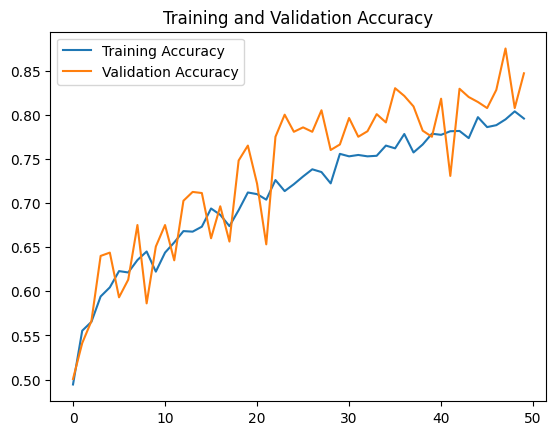

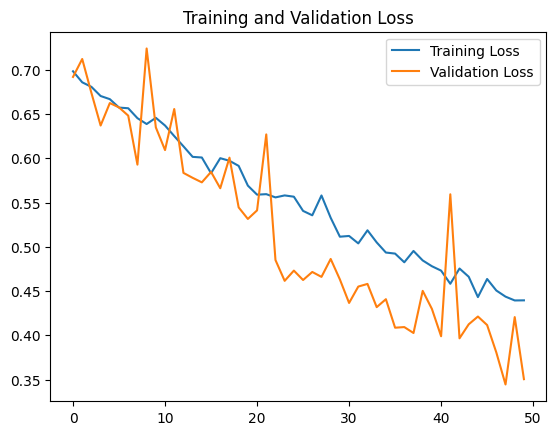

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [15]:
model.save('cat_dog_classifier_model.h5')

In [16]:
from tensorflow.keras.models import load_model
model = load_model('cat_dog_classifier_model.h5')


In [20]:
import cv2

In [23]:
test_img = cv2.imread('/content/test/dogs/dog.10017.jpg')

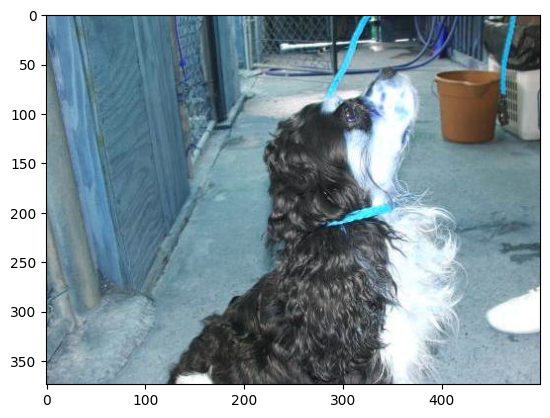

In [24]:
plt.imshow(test_img)

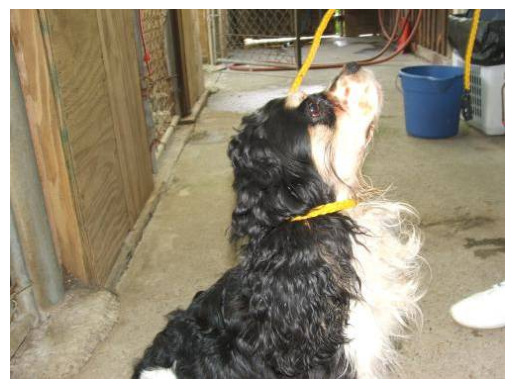

In [33]:
import cv2
import matplotlib.pyplot as plt

# Load the image
test_img = cv2.imread('/content/test/dogs/dog.10017.jpg')

# Check if the image was loaded successfully
if test_img is not None:
    # Convert BGR image to RGB
    test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(test_img_rgb)
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print("Error: Image not found or unable to load.")

In [34]:
test_img.shape

(374, 500, 3)

In [39]:
test_img = cv2.resize(test_img,(150,150))

In [41]:
test_input = test_img.reshape((1,150,150,3))

In [42]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


array([[1.]], dtype=float32)